In [3]:
import sqlite3

##Step 1:In Python, create the SQLite DB and a sample sales table.

In [2]:
# Connect to a new SQLite database file
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create a sales table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ('Pizza', 10, 8.99),
    ('Burger', 5, 4.99),
    ('Sandwich', 7, 3.99),
    ('Pizza', 4, 8.99),
    ('Burger', 6, 4.99)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

conn.commit()
conn.close()

Step 2: Run SQL Query in Python to Get Summary

In [4]:
import pandas as pd

In [5]:
# Connect to the database
conn = sqlite3.connect('sales_data.db')

# SQL query to calculate total quantity and revenue
query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load result into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print result
print(df)

    product  total_qty  revenue
0    Burger         11    54.89
1     Pizza         14   125.86
2  Sandwich          7    27.93


Step 3: Plot a Simple Bar Chart Using Matplotlib

In [6]:
import matplotlib.pyplot as plt

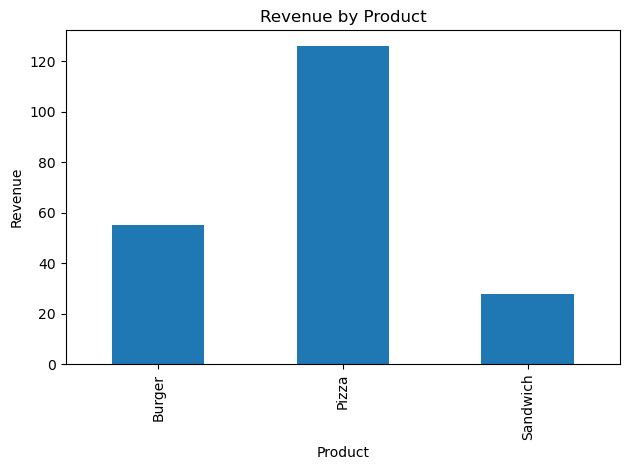

In [7]:
# Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional
plt.show()